In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable
import schemdraw
import schemdraw.elements as elm

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.19.1
matplotlib 3.1.3
pandas 0.25.3
datetime <module 'datetime' from '/home/facs/anaconda3/envs/myenv/lib/python3.8/datetime.py'>
holidays 0.11.2
seaborn 0.11.0
plotly 4.9.0
sys 3.8.5 | packaged by conda-forge | (default, Sep 24 2020, 16:55:52) 
[GCC 7.5.0]
os <module 'os' from '/home/facs/anaconda3/envs/myenv/lib/python3.8/os.py'>
locale <module 'locale' from '/home/facs/anaconda3/envs/myenv/lib/python3.8/locale.py'>


In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

# Light sources

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Objective</b></div>
    <ul>
        <li> Protecting the environment with better light sources </li>
        <li> Reduce energy consumption </li>
        <li> Remove light sources with toxic elements </li>
        <li> Improve material efficiency </li>
    </ul>
</div>

According to the EU Ecodesign regulation (2019), light sources that not fulfill energy efficiency requirements should not be placed in the market. Goods already in use or in the market can continue to be used.

All sources containing mercury should be discharged.

In this context LED technology arises as a good alternative

### Legal

EU norms for environmentally friendly energy products is regulated by Directive 2009/125/EU.
Examples of this are:

- 244/2009 ecodesign requirements for non-directional household lamps
- 245/2009 ecodesign requirements for fluorescent lamps without integrated ballast, high-intensity discharge lamps and ballasts and luminaires for their operation 
- 1194/2012 ecodesign requirements for directional lamps, LED lamps and associated equipment

Also there is no longer differentiation between “lamp” and “luminaire”, calling them “light sources”, making it more general and applying independent of the structural context (bulb included in furniture).

### For the user

To encourage user take better decisions labels are used to classify efficiency. Due to increasing efficiency, rescaling is needed, with old classification A++ translating into D or F. Also interchangeability and separate ballasts in luminaires is required by the EU, which leads to resource efficiency and saving for the user. Lastly, LED use is promoted as it significantly reduces energy consumption and significant savings can be made. For example changing from 60W incandescent  to 10W LED could generate 31.76 euros in saving per year, with a use of 6 hours per day and 29 cents/kWh. This also exemplifies how lumens should be used instead of watts, which makes comparison easier while comparing different technologies

![label](light-label.png)

### Time plan

Outphasing of different types of lightsources is planed as follows:

Important exceptions are:
- Lamps under 60 lumens or over 82,000 lumens
- Narrow light sources (< 10 degrees)
- Infrared light sources (except R7s in existing lengths)
- UV radiator (> 2mW/klm)
- Special applications e.g. B. for ovens (300 degrees Celsius) or signalling

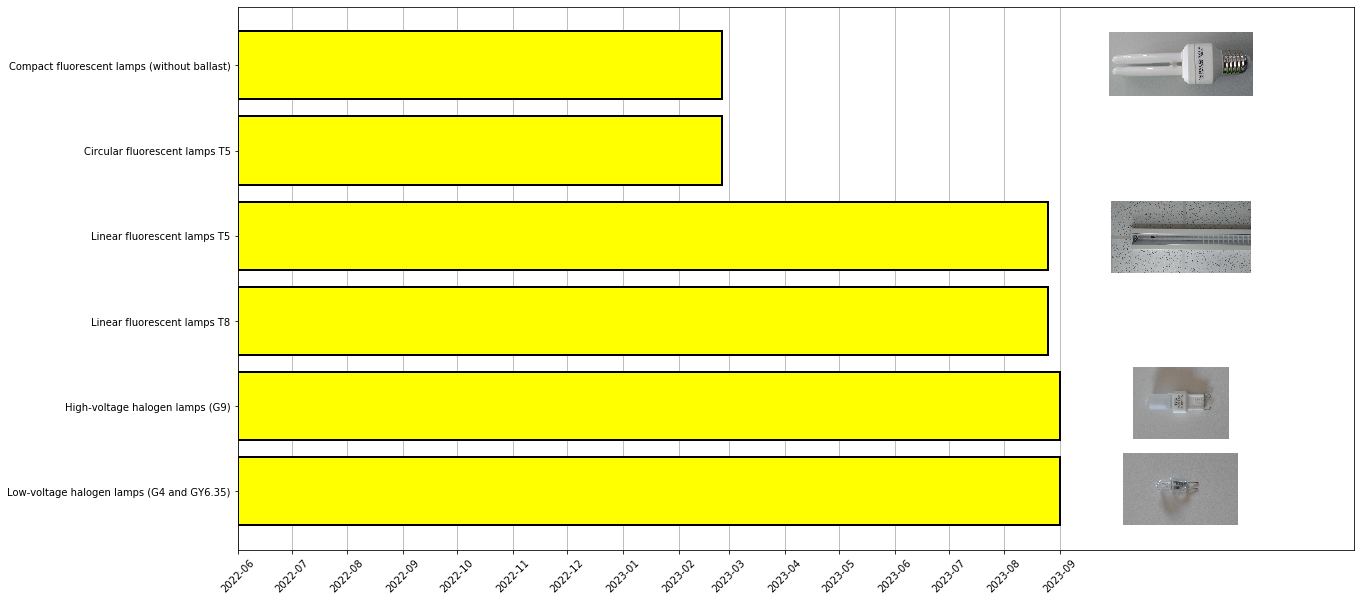

In [3]:
tasks=["Low-voltage halogen lamps (G4 and GY6.35)","High-voltage halogen lamps (G9)",
       "Linear fluorescent lamps T8","Linear fluorescent lamps T5","Circular fluorescent lamps T5",
       "Compact fluorescent lamps (without ballast)"]
finish=['2023-09-01','2023-09-01','2023-08-25','2023-08-25','2023-02-25','2023-02-25']
start=['2022-06-01']*6

df=pd.DataFrame()
df['Task']=tasks
df['Start']=pd.to_datetime(start, format='%Y-%m-%d', errors='ignore')
df['End']=pd.to_datetime(finish, format='%Y-%m-%d', errors='ignore')

# project start date
proj_start = df.Start.min()
df['start_num'] = (df.Start-proj_start).dt.days
df['end_num'] = (df.End-proj_start).dt.days
df['days_start_to_end'] = df.end_num - df.start_num

fig, ax = plt.subplots(1, figsize=(20,10))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num,color='yellow',edgecolor='black',linewidth=2)

ax.xaxis.grid()
ax.set_axisbelow(True)
plt.xlim([0,620])

##### TICKS #####
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%Y-%m-%d")

xticks_labels=[x if (x[-2:]=='01') else '' for x in xticks_labels]
xticks=[xticks_labels.index(x) for x in xticks_labels if(x!='')]
xticks_labels=[x[:-3] for x in xticks_labels if (x[-2:]=='01')]

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels,rotation=45)

positions=[0.75,0.63,0.51,0.39,0.28,0.16]
images=['1-Compact_fluorescent.jpg','2-empty.png','3-Linear_fluorescent_T5.jpg',
        '4-empty.png','5-hv-halogen.jpg','6-lv-halogen.jpg']

for pos,ims in zip(positions,images):
    im = plt.imread(os.path.join('../img/light/',ims))    
    newax = fig.add_axes([0.73,pos,0.1,0.1])
    newax.imshow(im)
    newax.axis('off')

plt.show()

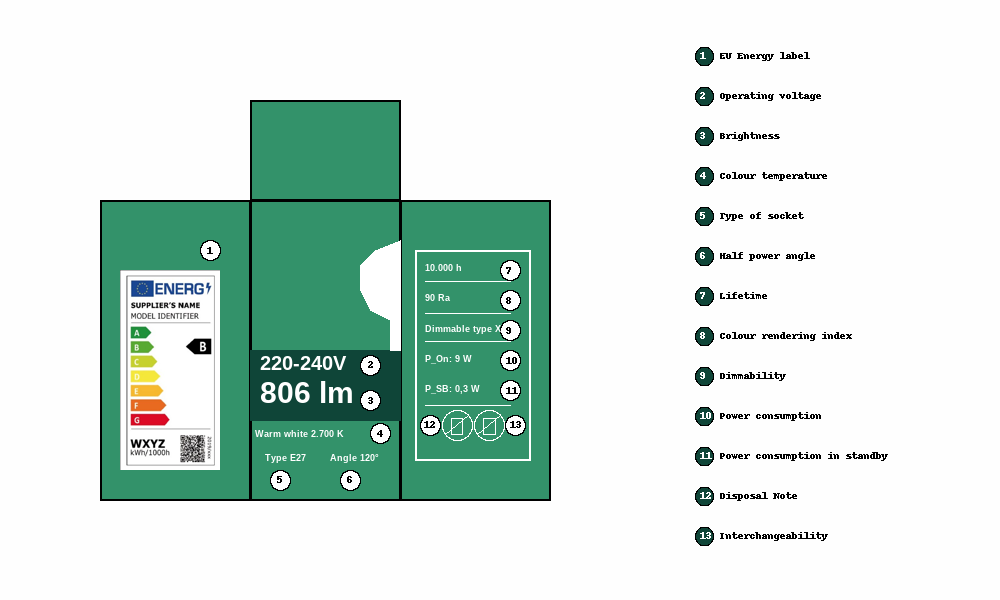

In [4]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

img = Image.new('RGB', (1000, 600), color = (254, 254, 254))
d = ImageDraw.Draw(img)

c1=(51,146,106)
c2=(15,69,56)
texts=['EU Energy label','Operating voltage','Brightness','Colour temperature','Type of socket','Half power angle',
   'Lifetime','Colour rendering index','Dimmability','Power consumption','Power consumption in standby',
    'Disposal Note','Interchangeability']

#Boxes
#d.rectangle(((X_left, Y_up), (X_right, Y_down))

d.rectangle(((250, 200), (400, 500)), fill=c1, outline='black', width=2)
d.rectangle(((100, 200), (250, 500)), fill=c1, outline='black', width=2)
d.rectangle(((400, 200), (550, 500)), fill=c1, outline='black', width=2)
d.rectangle(((250, 100), (400, 200)), fill=c1, outline='black', width=2)

d.rectangle(((415, 250), (530, 460)), outline='white', width=2)
d.rectangle(((250, 350), (400, 420)), fill=c2)

#Circles
for x,i,t in zip(range(1,14),range(0,601,40),texts):
    d.ellipse((695,47+i,713,66+i), fill = c2, outline ='black')
    d.text((700,50+i), str(x), fill='white')
    d.text((720,50+i),t, fill='black')    
    
#d.ellipse((X_left, Y_up), (X_right, Y_down))    

#Energy label
d.ellipse((200,240,220,260), fill = 'white', outline ='black')    
d.text((207,245), '1', fill='black')
label=Image.open('../img/light/light-label.png').resize((100, 200))
img.paste(label, (120, 270))


#set font
try:
    aux=ImageFont.truetype("LiberationSans-Bold.ttf", 20)
    gfont="LiberationSans-Bold.ttf"
except:
    aux=ImageFont.truetype("Arial.ttf", 20)
    gfont="Arial.ttf"
    
#220-240V
d.ellipse((360,355,380,375), fill = 'white', outline ='black')    
d.text((368,359), '2', fill='black')
d.text((260,355), '220-240V', fill='white',font = ImageFont.truetype(gfont, 20))

#806 lm
d.ellipse((360,390,380,410), fill = 'white', outline ='black')    
d.text((368,395), '3', fill='black')
d.text((260,381), '806 lm', fill='white',font = ImageFont.truetype(gfont, 30))

#Warm white 2.700 K'
d.ellipse((370,423,390,443), fill = 'white', outline ='black')    
d.text((377,428), '4', fill='black')
d.text((255,430), 'Warm white 2.700 K', fill='white',font = ImageFont.truetype(gfont, 9))

#Socket type
d.ellipse((270,470,290,490), fill = 'white', outline ='black')    
d.text((277,474), '5', fill='black')
d.text((265,454), 'Type E27', fill='white',font = ImageFont.truetype(gfont, 9))

#Angle
d.ellipse((340,470,360,490), fill = 'white', outline ='black')    
d.text((347,474), '6', fill='black')
d.text((330,454), 'Angle 120°', fill='white',font = ImageFont.truetype(gfont, 9))

#Lifetime
d.ellipse((500,260,520,280), fill = 'white', outline ='black')    
d.text((506,265), '7', fill='black')
d.text((425,264), '10.000 h', fill='white',font = ImageFont.truetype(gfont, 9))
d.line(((425, 281), (510, 281)), fill='white',width=1)

#Colour rendering index
d.ellipse((500,290,520,310), fill = 'white', outline ='black')    
d.text((506,295), '8', fill='black')
d.text((425,294), '90 Ra', fill='white',font = ImageFont.truetype(gfont, 9))
d.line(((425, 313), (510, 313)), fill='white',width=1)

#Dimmability
d.ellipse((500,320,520,340), fill = 'white', outline ='black')    
d.text((506,325), '9', fill='black')
d.text((425,325), 'Dimmable type X', fill='white',font = ImageFont.truetype(gfont, 9))
d.line(((425, 341), (510, 341)), fill='white',width=1)

#Power consumption
d.ellipse((500,350,520,370), fill = 'white', outline ='black')    
d.text((506,355), '10', fill='black')
d.text((425,355), 'P_On: 9 W', fill='white',font = ImageFont.truetype(gfont, 9))

#Power consumption Standby
d.ellipse((500,380,520,400), fill = 'white', outline ='black')    
d.text((506,385), '11', fill='black')
d.text((425,385), 'P_SB: 0,3 W', fill='white',font = ImageFont.truetype(gfont, 9))
d.line(((425, 405), (510, 405)), fill='white',width=1)

#Disposal note
d.ellipse((420,415,440,435), fill = 'white', outline ='black')    
d.text((424,419), '12', fill='black')
d.ellipse((442,410,472,440), outline ='white')    
d.line(((445, 434), (468, 415)), fill='white',width=1)
d.rectangle(((451, 434), (462, 418)), outline='white', width=1)

#interchangeability
d.ellipse((505,415,525,435), fill = 'white', outline ='black')    
d.text((510,419), '13', fill='black')
d.ellipse((474,410,504,440), outline ='white')    
d.line(((477, 434), (500, 415)), fill='white',width=1)
d.rectangle(((483, 434), (495, 418)), outline='white', width=1)

# "Bulb"
d.polygon([(400,240),(375,250),(360,265),(360,290),(370,310),(390,320),(390,350),(400,350)], fill = 'white')

img

### Label

Starting in March 2023, the use of the new labeling is mandatory. Besides rescaling and some graphical differences, the new labeling contains a QR code, and all light sources must be listed in “European Product Registry for Energy Labelling” (EPREL).


### Classes

The new classes can not be directly calculated from the old classes as the formulas used are different.

The formula to calculate clases is as following:

$$ \eta_{TM} = \frac{\phi_{use}}{P_{on}} \cdot F_{TM} $$

where:

$\eta_{TM}$ =  Total luminous efficacy (lm/W)

$\phi_{use}$ = Luminous flux (lm)

$P_{on}$ = Specific power (W)

$F_{TM}$ = Directional Factor (-)

Energy efficiency<br> class |Total luminous<br> efficacy ηTM (lm/W)
-----|-----
A|210 ≤ ηTM
B|185 ≤ ηTM < 210
C|160 ≤ ηTM < 185
D|135 ≤ ηTM < 160
E|110 ≤ ηTM < 135
F|85 ≤ ηTM < 110
G|ηTM < 85


### Sources
- Legal:

https://www.licht.de/de/lichtthemen/lampenausstieg/gesetzliche-grundlagen

https://ec.europa.eu/info/energy-climate-change-environment/standards-tools-and-labels/products-labelling-rules-and-requirements/energy-label-and-ecodesign/energy-efficient-products/lighting_en

https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1575537561243&uri=CELEX:32019R2015
- User: https://www.licht.de/de/lichtthemen/lampenausstieg/wichtig-fuer-verbraucher
- Timetable: https://www.licht.de/de/lichtthemen/lampenausstieg/zeitplan-fuer-den-ausstieg
- Label: https://www.licht.de/de/lichtthemen/lampenausstieg/energielabel
- Classes: https://www.licht.de/de/lichtthemen/lampenausstieg/energieeffizienzklassen